# Análisis de Datos: Videojuegos 

En el presente proyecto se llevará a cabo el análisis de datos de un registro de ventas de videojuegos. El objetivo principal del proyecto es identificar tendencias y patrones de comportamiento de la industria para así planear una campaña exitosa para las ventas de videojuegos en 2017. 

## Inicialización 

Comenzaremos descargando nuestras librerias, cargando nuestro CSV y, en caso de ser necesario, limpiar nuestra vace de datos.  

### Limpieza de datos 

En esta primera etapa vamos a realizar los siguientes pasos: 

1. Ajustar los nombres de las columnas para que todos queden en minúsculas. 
2. Verificar que los tipos de datos coincidan con los datos asentados en la base de datos. 
3. Procesamiento de valores ausentes. 
4. Agregaremos columnas con información adicional que podría ser útil para nuestro análsis. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns 

In [2]:
games = pd.read_csv('/datasets/games.csv')

games.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   Name             16713 non-null  object 
, 1   Platform         16715 non-null  object 
, 2   Year_of_Release  16446 non-null  float64
, 3   Genre            16713 non-null  object 
, 4   NA_sales         16715 non-null  float64
, 5   EU_sales         16715 non-null  float64
, 6   JP_sales         16715 non-null  float64
, 7   Other_sales      16715 non-null  float64
, 8   Critic_Score     8137 non-null   float64
, 9   User_Score       10014 non-null  object 
, 10  Rating           9949 non-null   object 
,dtypes: float64(6), object(5)
,memory usage: 1.4+ MB


In [3]:
new_col_names = []
for name in games.columns: 
    name_lowered = name.lower()
    new_col_names.append(name_lowered)

games.columns = new_col_names

games.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             16713 non-null  object 
, 1   platform         16715 non-null  object 
, 2   year_of_release  16446 non-null  float64
, 3   genre            16713 non-null  object 
, 4   na_sales         16715 non-null  float64
, 5   eu_sales         16715 non-null  float64
, 6   jp_sales         16715 non-null  float64
, 7   other_sales      16715 non-null  float64
, 8   critic_score     8137 non-null   float64
, 9   user_score       10014 non-null  object 
, 10  rating           9949 non-null   object 
,dtypes: float64(6), object(5)
,memory usage: 1.4+ MB


In [4]:
games = games.dropna(subset=['year_of_release'])

games['year_of_release'] = games['year_of_release'].astype('int')


In [5]:
games.dropna(subset=['name','genre'],inplace=True)
games['critic_score'].replace(['tbd'],np.nan) 
games['critic_score'] = games['critic_score'].astype('float')
games['user_score'] = games['user_score'].replace(['tbd',' '],np.nan)   
games['user_score'] = games['user_score'].astype('float')
games['rating'].fillna('tbd',inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 16444 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             16444 non-null  object 
, 1   platform         16444 non-null  object 
, 2   year_of_release  16444 non-null  int64  
, 3   genre            16444 non-null  object 
, 4   na_sales         16444 non-null  float64
, 5   eu_sales         16444 non-null  float64
, 6   jp_sales         16444 non-null  float64
, 7   other_sales      16444 non-null  float64
, 8   critic_score     7983 non-null   float64
, 9   user_score       7463 non-null   float64
, 10  rating           16444 non-null  object 
,dtypes: float64(6), int64(1), object(4)
,memory usage: 1.5+ MB


In [6]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
,0                Wii Sports      Wii             2006        Sports     41.36   
,1         Super Mario Bros.      NES             1985      Platform     29.08   
,2            Mario Kart Wii      Wii             2008        Racing     15.68   
,3         Wii Sports Resort      Wii             2009        Sports     15.61   
,4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   
,
,   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
,0     28.96      3.77         8.45          76.0         8.0      E   
,1      3.58      6.81         0.77           NaN         NaN    tbd   
,2     12.76      3.79         3.29          82.0         8.3      E   
,3     10.93      3.28         2.95          80.0         8.0      E   
,4      8.89     10.22         1.00           NaN         NaN    tbd   
,
,   total_sales  
,0        82.54  
,1        40.24  
,2        35.52  
,

### Conclusiones de la Limpieza de datos

Ya tenemos nuestro Dataset listo para iniciar con el análisis. Algunas de las acciones que llevamos a cabo en este proceso son: 

1. Para que sea más fácil trabajar con los datos de las columnas ajustamos los nombres de estas a minúsculas.
2. Eliminamos los datos ausentes. En su mayoría (269 filas) las filas eliminadas no tenían el dato correspondiente a fecha de lanzamieno (columna 'year_of_release'). Al respecto, no es posible identificar el año de lanzamiento implementando el método de la media o la mediana, por ello se determino eliminar las filas. Es importante mencionar que los datos de ventas correspondientes a dichas celdas vacías estaban por debajo del millón de dólares (1.00), por lo que el impacto de eliminar dichas celdas no es tan significativo. 
Adicionalmente, se eliminaron dos filas donde se identificaron ausentes los valores de las columnas 'name' y 'genre'. Toda vez que no se puede identificar el nombre ni el género del videojuego, y considerando que dichas celdas tiene valores ausentes en las columnas 'critic_score', 'user_score' y 'rating'; y que los valores de las ventas son menores a un millón, eliminar dichas celdas no representa un cambio significativo para nuestro análisis de datos.
Es importante mencionar que únicamente se eliminó el 1.6% de los datos. 
Probablemente la ausencia de esos datos se deba a una omisión de la persona encargada de alimentar la base de datos.
3. Procesamos los datos austentes de las columnas 'critic_score' y 'user_score', para ellos sustituimos los valores ausentes y los tbd con NaN. De esta manera, podemos convertir nuestros datos a tipo float y así realizar operaciones con ellos en caso de ser necesario. 
4. También ajustamos el tipo de datos de la columna 'year_of_release' pasandola de floan a int, ya que por las características de dichos datos, únicamente se están manejando valores enteros.
5. Finalmente, agregamos una columna 'total_sales', la cual podría ser útil en caso de requerir un análisis comparativo de las ventas totales.  

# Análisis de datos


## Lanzamiento de videojuegos por año

En este primer análisis identificaremos cuántos videojuegos fueron lanzados en diferentes años. 

<AxesSubplot:title={'center':'Cantidad de videojuegos estrenados por año'}, xlabel='Años', ylabel='Cantidad de videojuegos'>

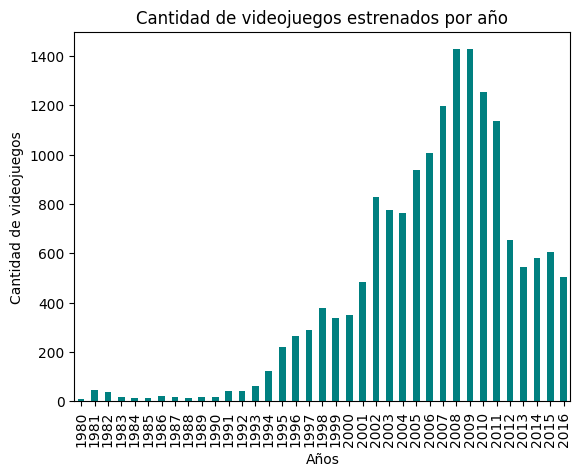

In [7]:
games_year = games.groupby('year_of_release')['name'].count()
games_year.plot(title = 'Cantidad de videojuegos estrenados por año',
               xlabel='Años',
               ylabel='Cantidad de videojuegos',
               x='year_of_release',
               kind='bar',
               color='teal'
               )

### Conclusión del Análisis
Del análisis de datos, podemos identificar que desde el 2002 los lanzamientos de nuevos videojuegos incrementaron significativamente hasta 2008. A partir de 2009 estos lanzamientos decayeron. 

Tomando en cuenta lo anterior, podemos establecer que los datos tienen una mayor significancia desde dicho año, ya que hay un mayor número de registros y de elementos para enriquecer nuestro análisis (a partir de ese año se produjeron al menos la mitad de cantidad de videojuegos que se produjeron en los 2008 y 2009). 

## Variación de la venta de videojuegos por plataforma

En este apartado analizaremos las ventas de videojuegos por tipos de plataforma. 

<AxesSubplot:title={'center':'Ventas de videojuegos por plataformas'}, xlabel='Plataformas', ylabel='Ventas totales (USD)'>

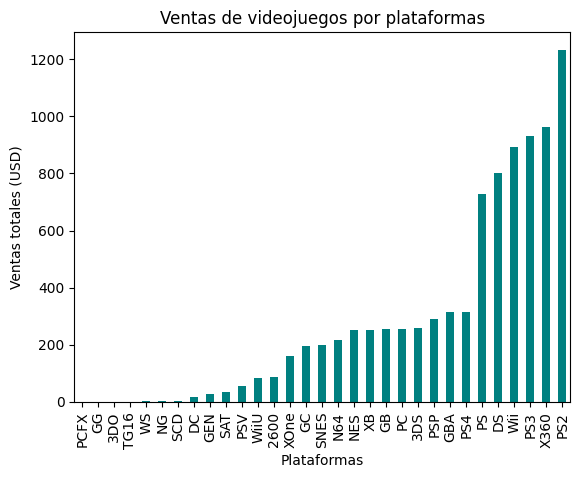

In [8]:
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values()
platform_sales.plot(title = 'Ventas de videojuegos por plataformas',
               xlabel='Plataformas',
               ylabel='Ventas totales (USD)',
               x='platform',
               kind='bar',
               color='teal'
               )

Las cinco plataformas con las mayores cantidades de ventas son el PS2, X360, PS3, Wii y DS. 

In [9]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
platforms_data = games[['platform','year_of_release','total_sales']]
platforms_filtered = platforms_data[platforms_data['platform'].isin(top_platforms)].reset_index()
platforms_grouped = platforms_filtered.groupby(['year_of_release','platform'])['total_sales'].sum()
print(platforms_grouped)

year_of_release  platform
,1985             DS            0.02
,2000             PS2          39.17
,2001             PS2         166.43
,2002             PS2         205.38
,2003             PS2         184.31
,2004             DS           17.27
,                 PS2         211.81
,2005             DS          130.14
,                 PS2         160.66
,                 X360          8.25
,2006             DS          119.81
,                 PS2         103.42
,                 PS3          20.96
,                 Wii         137.15
,                 X360         51.62
,2007             DS          146.94
,                 PS2          75.99
,                 PS3          73.19
,                 Wii         152.77
,                 X360         95.41
,2008             DS          145.31
,                 PS2          53.90
,                 PS3         118.52
,                 Wii         171.32
,                 X360        135.26
,2009             DS          119.54
,           

Tomando como referencia las consolas más exitosas, podemos identificar las siguientes patrones: 
1. Aproximadamente las consolas más exitosas se pueden mantener en el mercado entre 10 y 30 años.
2. El máximo de tiempo en el que surgen nuevas consolas exitosas puede tardar de un año a 15 años.

<AxesSubplot:title={'center':'Total de ventas por año'}, xlabel='Año', ylabel='Millones de USD'>

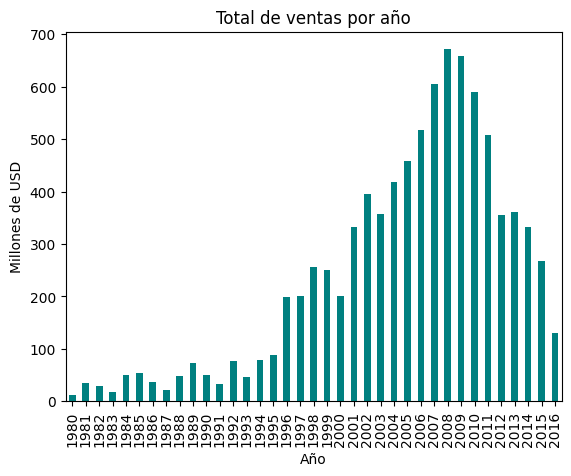

In [10]:
sales_grouped = games.groupby('year_of_release')['total_sales'].sum()
sales_grouped.plot(title='Total de ventas por año',
                  x='year_of_release',
                  kind='bar',
                  xlabel='Año',
                  ylabel='Millones de USD',
                  color='teal')


Con el fin de identificar patrones y tendencias, tomaremos únicamente los datos comprendidos dentro del periodo de 2006 a 2016. Esto considerando que la permanencia mínima de una consola es de 10 años. En ese sentido, si para 2006 alguna consola ya va de salida, se verá reflejada en nuestro análisis. 
Asimismo, es importante considerar que cada año puede surgir una nueva consola, por lo que si alguna consola surgió en 2006, probablemente en el transcurso del tiempo de 2006 a 2016 podríamos ver su crecimiento.

<AxesSubplot:title={'center':'Ventas por plataformas (2006-2016)'}, xlabel='Plataforma', ylabel='Ventas ttales (USD)'>

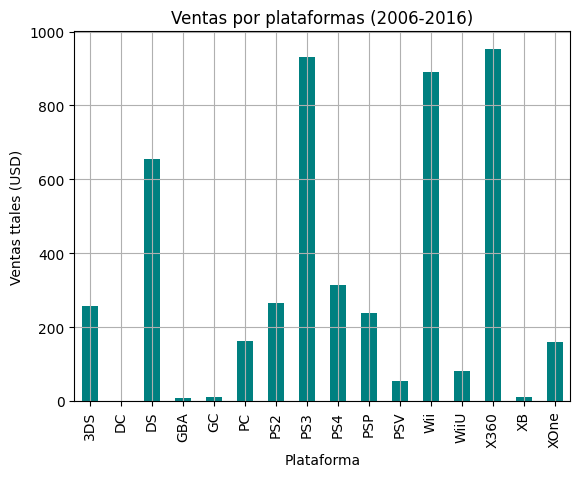

In [11]:
games_filtered = games[games['year_of_release']>2005].reset_index()
platform_sales = games_filtered.groupby('platform')['total_sales'].sum()
platform_sales.plot(title='Ventas por plataformas (2006-2016)',
                   x='platform',
                   xlabel='Plataforma',
                   ylabel='Ventas ttales (USD)',
                   kind='bar',
                   color='teal',
                   grid=True)

Podemos observar que las plataformas líderes en ventas son: PS3, X360, Wii, DS y PS4. 
Por el contrario, para el resto de las plataformas, al ser significativamente inferiores en ventas, podemos suponer que estás van en decadencia en ventas. 


<AxesSubplot:title={'center':'Evolución de ventas por plataforma (2006 a 2016)'}, xlabel='Año', ylabel='Ventas totales (Millones de USD)'>

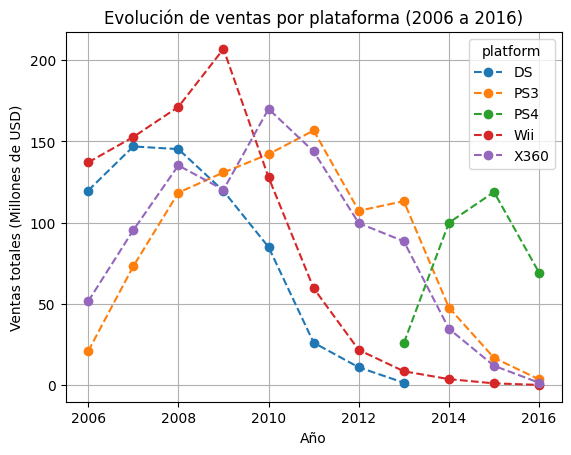

In [12]:
top_platforms_1 = ['PS3', 'X360', 'Wii', 'DS', 'PS4']
platforms_data_1 = games[['platform','year_of_release','total_sales']]
platforms_filtered_1 = platforms_data_1[(platforms_data_1['platform'].isin(top_platforms_1)) & (platforms_data_1['year_of_release']>2005)].reset_index(drop=True)
platforms_grouped_1 = platforms_filtered_1.groupby(['year_of_release','platform'])['total_sales'].sum()
platforms_grouped_1 = platforms_grouped_1.reset_index()
pivot = platforms_grouped_1.pivot(index='year_of_release',columns='platform',values='total_sales')
pivot.plot(title='Evolución de ventas por plataforma (2006 a 2016)',
          xlabel='Año',
          ylabel='Ventas totales (Millones de USD)',
          grid=True,
          kind='line',
          linestyle='--',
          marker='o'
          )

De la gráfica podemos identificar lo siguiente: 
1. El Wii y el DS tuvieron un apogeo significativo, sin embargo llegaron a su pico y bajaron las ventas. Por lo que estas plataformas no son rentables.
2. El X360 si bien se ha mantenido por 10 años, sus ventas no fueron tan estable, por lo que esta plataforma tampoco es rentable.
3. El PS3 se mantuvo estable durante un periodo significativo de tiemp. Podría ser rentable por la estabilidad que tiene en ventas.
4. El PS4 ingresó al mercado en 2013 y para 2015 ya contaba con un incremento significativo de ventas. Debido a la novedad del producto así como al comportamiento de las ventas esta plataforma puede ser altamente rentable con una campaña publicitaria adecuada.  

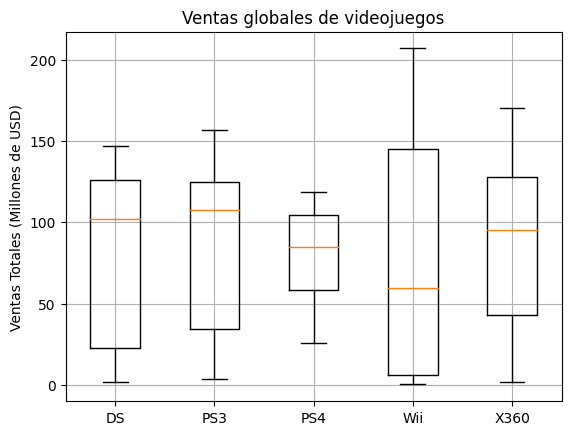

In [13]:
ds_data = platforms_grouped_1[platforms_grouped_1['platform']=='DS']['total_sales']
ps3_data = platforms_grouped_1[platforms_grouped_1['platform']=='PS3']['total_sales']
ps4_data = platforms_grouped_1[platforms_grouped_1['platform']=='PS4']['total_sales']
wii_data = platforms_grouped_1[platforms_grouped_1['platform']=='Wii']['total_sales']
x360_data = platforms_grouped_1[platforms_grouped_1['platform']=='X360']['total_sales']
plt.boxplot([ds_data,ps3_data,ps4_data,wii_data,x360_data],labels=['DS','PS3','PS4','Wii','X360'])
plt.title('Ventas globales de videojuegos')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.grid(True)

Podemos identificar las siguientes conclusiones de nuestro diagrama de caja y bigotes: 
1. El DS tuvo un periodo relativamente corto de ventas superiores al promedio. Existe una distribución significativa de las ventas para dicha plataforma (entre 0 y 145 millones de dolares
2. El PS3 presenta menos dispersión entre sus ventas.
3. Para el caso del PS4 podemos identiicar que, al ser una plataforma relativamente nueva, sus ventas tienen menos variabilidad. Es importante destacar que a pesar de ser nueva su promedio de ventas es elevado
4. Para el Wii podemos observar una dispersión muy elevada entre sus ventas. A pesar de llegar a ventas incluso de más de 200 millones de dólares, el promedio se queda en aproximadamente 60 millones. Lo cual demuestra que esta plataforma tuvo años con ingresos muy elevado pero también con ingresos muy débiles.
5. Por lo que respecta al X360, presenta un buen rendimiento promedio, sin embargo las ventas para esta plataforma también son muy variadas.


Podemos concluir que nuestras plataformas más estables son: PS3, X360 y PS4

In [14]:
just_wii = games[games['platform']=='Wii'].reset_index()
print(just_wii)

      index                                               name platform  \
,0         0                                         Wii Sports      Wii   
,1         2                                     Mario Kart Wii      Wii   
,2         3                                  Wii Sports Resort      Wii   
,3         7                                           Wii Play      Wii   
,4         8                          New Super Mario Bros. Wii      Wii   
,...     ...                                                ...      ...   
,1281  16589                                          Bomberman      Wii   
,1282  16626                   The Ultimate Battle of the Sexes      Wii   
,1283  16664           Mahou Sensei Negima!? Neo-Pactio Fight!!      Wii   
,1284  16685              Help Wanted: 50 Wacky Jobs (jp sales)      Wii   
,1285  16686  Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...      Wii   
,
,      year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
,0    

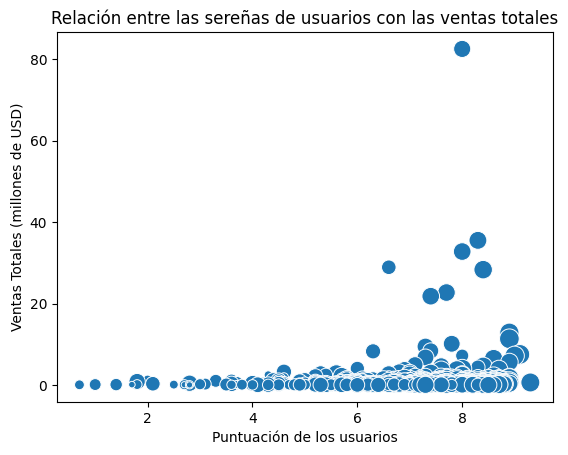

In [15]:
just_wii = just_wii.dropna(subset=['user_score','critic_score','total_sales'])
sns.scatterplot(data=just_wii,
               x='user_score',
               y='total_sales',
               palette='coolwarm',
               size='critic_score',
               sizes=(20,200),
               legend=None)
plt.title('Relación entre las sereñas de usuarios con las ventas totales')
plt.xlabel('Puntuación de los usuarios')
plt.ylabel('Ventas Totales (millones de USD)')

plt.show()

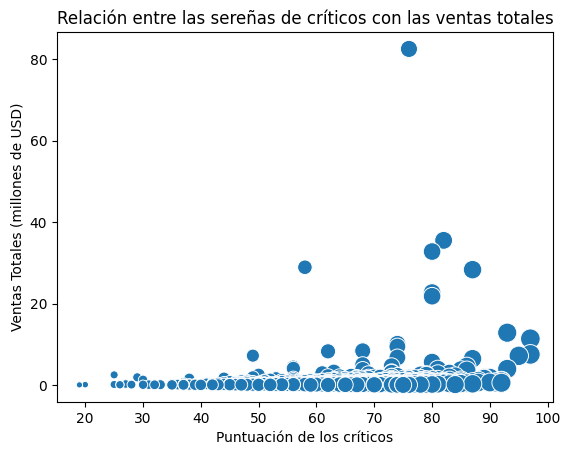

In [16]:
just_wii = just_wii.dropna(subset=['user_score','critic_score','total_sales'])
sns.scatterplot(data=just_wii,
               x='critic_score',
               y='total_sales',
               palette='coolwarm',
               size='critic_score',
               sizes=(20,200),
               legend=None)
plt.title('Relación entre las sereñas de críticos con las ventas totales')
plt.xlabel('Puntuación de los críticos')
plt.ylabel('Ventas Totales (millones de USD)')

plt.show()

In [17]:
corr_users_sales = just_wii['user_score'].corr(just_wii['total_sales'])
corr_critic_sales = just_wii['critic_score'].corr(just_wii['total_sales'])
print(f'La correlación entre la puntuación del usuario y el total de ventas es: {corr_users_sales}')
print(f'La correlación entre la puntuación del critico y el total de ventas es: {corr_critic_sales}')

La correlación entre la puntuación del usuario y el total de ventas es: 0.11063675382808996
,La correlación entre la puntuación del critico y el total de ventas es: 0.17085459105550813


Existe una correlación positiva pero débil entre la puntuación de usuarios y críticos y el total de ventas. Esto quiere decir que, si bien las criticas son favorables para los videojuegos para la plataforma, esto no neceariamente incrementará las ventas totales de las plataformas.

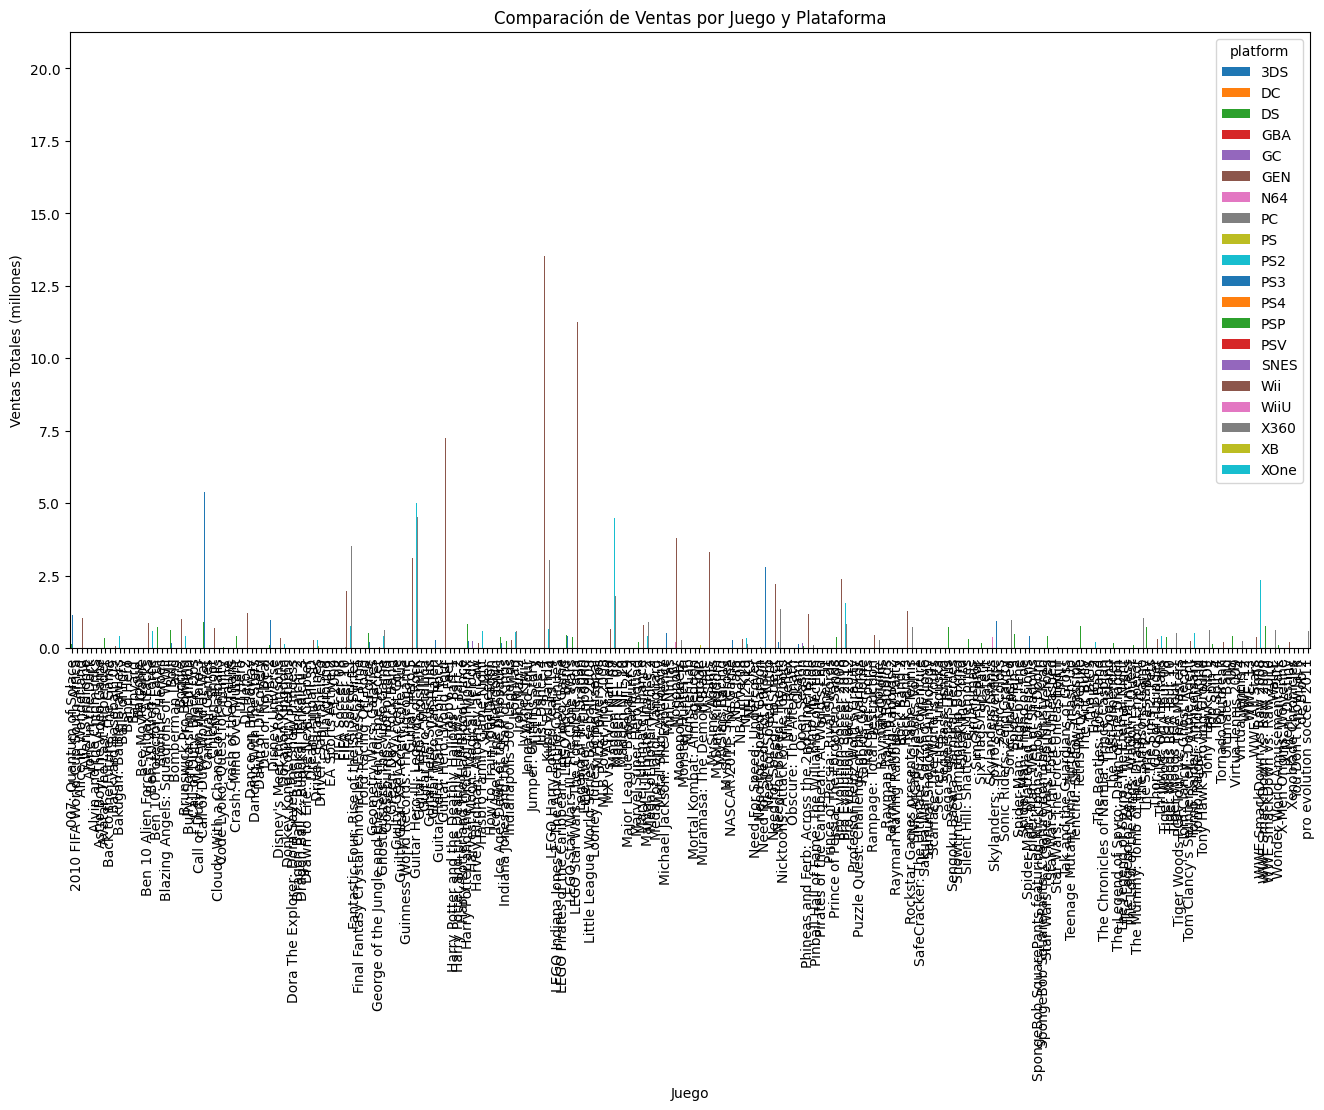

In [18]:
wii_game_names = just_wii['name'].unique()
games_other_platforms = games[(games['name'].isin(wii_game_names))]
combined_games = pd.concat([just_wii, games_other_platforms])
grouped_sales = combined_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
pivot_sales = grouped_sales.pivot(index='name',columns='platform',values='total_sales')
pivot_sales = pivot_sales.dropna(thresh=2)
pivot_sales.plot(kind='bar',
                 figsize=(16, 8),
                 title='Comparación de Ventas por Juego y Plataforma',
                 ylabel='Ventas Totales (millones)',
                 xlabel='Juego',
                 rot=90)
plt.show()

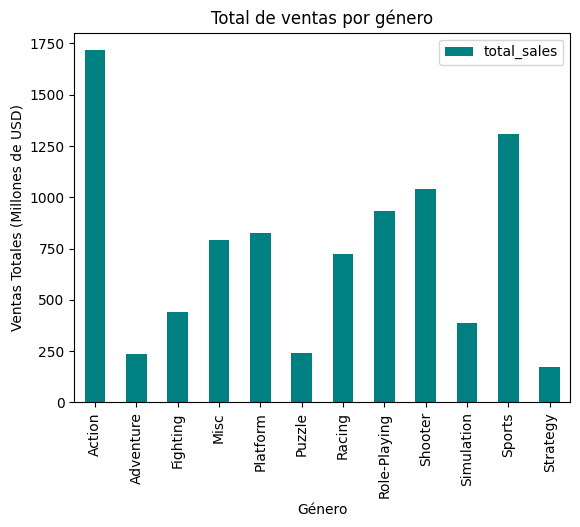

In [19]:
grouped_genre = games.groupby('genre')['total_sales'].sum().reset_index()
grouped_genre.plot(kind='bar',
                  title='Total de ventas por género',
                  x='genre',
                  xlabel='Género',
                  ylabel='Ventas Totales (Millones de USD)',
                  color='teal')
plt.show()

Podemos identificar que los 5 géneros más rentables son: Action, Sports, Shooter, Role-Playing y Racing. 

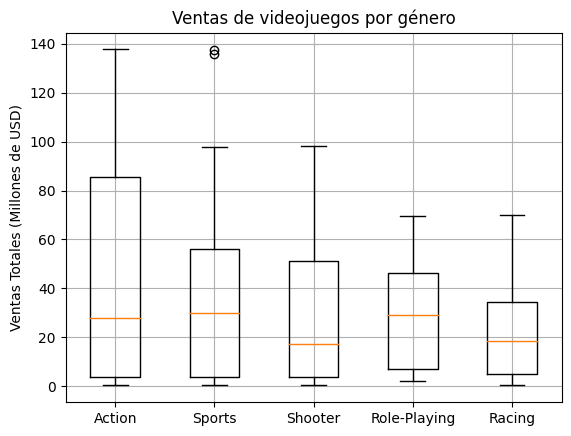

In [20]:
top_genres = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing']
genres = games[['genre','year_of_release','total_sales']]
genres_filtered = genres[(genres['genre'].isin(top_genres))].reset_index(drop=True)
genres_grouped = genres_filtered.groupby(['year_of_release','genre'])['total_sales'].sum()
genres_grouped = genres_grouped.reset_index()
action_data = genres_grouped[genres_grouped['genre']=='Action']['total_sales']
sports_data = genres_grouped[genres_grouped['genre']=='Sports']['total_sales']
shooter_data = genres_grouped[genres_grouped['genre']=='Shooter']['total_sales']
role_data = genres_grouped[genres_grouped['genre']=='Role-Playing']['total_sales']
race_data = genres_grouped[genres_grouped['genre']=='Racing']['total_sales']
plt.boxplot([action_data,sports_data,shooter_data,role_data,race_data],labels=['Action','Sports','Shooter','Role-Playing','Racing'])
plt.title('Ventas de videojuegos por género')
plt.ylabel('Ventas Totales (Millones de USD)')
plt.grid(True)

Derivado del análisis podemos identificar lo siguiente: 
1. Los géneros Action y Sports lideran en ventas (tienen mayor promedio y los valores máximos más altos). Es importante mencionar que los datos más elevados de sports corresponden a valores atípicos. 
2. Los géneros Shooter y Role-Playing tienen ventas más consistentes. La distribución de sus ventas es menor.
3. Racing es el género con menores ventas. 

### Conclusiones del análisis: 

1. El PS4 es una nueva plataforma que ha presentado cifras importantes y estables en ventas.
2. Las críticas de los usuarios y de los expertos tienen una correlación positiva pero débil con las ventas de cada uno de los videojuegos.
3. Loa generos más atractivos son 'Action' y 'Sports'. 

## Perfil de usuario por región

Con el fin de identificar las características de los usuarios en cada una de las regiones, llevaremos un análisis diferenciado de cada región. 

In [21]:
na_data = games[['platform','genre','na_sales','rating','total_sales']]
na_data_grouped = na_data.groupby('platform')['na_sales'].sum()
na_top_5 = na_data_grouped.sort_values(ascending=False).head(5)
ue_data = games[['platform','genre','eu_sales','rating','total_sales']]
ue_data_grouped = ue_data.groupby('platform')['eu_sales'].sum()
ue_top_5 = ue_data_grouped.sort_values(ascending=False).head(5)
jp_data = games[['platform','genre','jp_sales','rating','total_sales']]
jp_data_grouped = jp_data.groupby('platform')['jp_sales'].sum()
jp_top_5 = jp_data_grouped.sort_values(ascending=False).head(5)
print(f'La cinco plataformas principales en Norte América son:\n {na_top_5}')
print(f'La cinco plataformas principales en Europa son:\n {ue_top_5}')
print(f'La cinco plataformas principales en Japón son:\n {jp_top_5}')

La cinco plataformas principales en Norte América son:
, platform
,X360    595.74
,PS2     572.92
,Wii     486.87
,PS3     390.13
,DS      380.31
,Name: na_sales, dtype: float64
,La cinco plataformas principales en Europa son:
, platform
,PS2     332.63
,PS3     327.21
,X360    268.32
,Wii     258.32
,PS      212.39
,Name: eu_sales, dtype: float64
,La cinco plataformas principales en Japón son:
, platform
,DS      175.02
,PS      139.78
,PS2     137.54
,SNES    116.55
,3DS     100.62
,Name: jp_sales, dtype: float64


Los usuarios en Europa comparten preferencias en plataformas con los usuarios en Norte América. 
Los usuarios en Japón tienen preferencias de plataformas completamente diferentes a las de las otras regiones.

In [22]:
na_data_grouped_genres = na_data.groupby('genre')['na_sales'].sum()
na_top_5_genres = na_data_grouped_genres.sort_values(ascending=False).head(5)
ue_data_grouped_genres = ue_data.groupby('genre')['eu_sales'].sum()
ue_top_5_genres = ue_data_grouped_genres.sort_values(ascending=False).head(5)
jp_data_grouped_genres = jp_data.groupby('genre')['jp_sales'].sum()
jp_top_5_genres = jp_data_grouped_genres.sort_values(ascending=False).head(5)
print(f'Los cinco géneros principales en Norte América son:\n {na_top_5_genres}')
print(f'Los cinco géneros principales en Europa son:\n {ue_top_5_genres}')
print(f'Los cinco géneros principales en Japón son:\n {jp_top_5_genres}')

Los cinco géneros principales en Norte América son:
, genre
,Action      863.17
,Sports      671.20
,Shooter     584.83
,Platform    444.44
,Misc        399.57
,Name: na_sales, dtype: float64
,Los cinco géneros principales en Europa son:
, genre
,Action     510.99
,Sports     371.33
,Shooter    314.52
,Racing     234.49
,Misc       210.60
,Name: eu_sales, dtype: float64
,Los cinco géneros principales en Japón son:
, genre
,Role-Playing    353.39
,Action          160.14
,Sports          134.93
,Platform        130.71
,Misc            107.02
,Name: jp_sales, dtype: float64


Los géneros principales son similares en Norte América y en Europa, la diferencia principal, es que mientras que en Norte América prefieren el género 'Platform', en Europa prefieren el 'Racing'. 

Japón comparte géneros con las dos regiones, sin embargo la mayor preferencia de los usuarios se centra en el género Role-Playing. Asimismo, podemos observar que en Japón dentro de los cinco principales géneros no se encuentra el 'shooter'. 

In [23]:
na_average=na_data.groupby('rating')['na_sales'].mean().sort_values(ascending=True)
print(na_average)
ue_average=ue_data.groupby('rating')['eu_sales'].mean().sort_values(ascending=True)
print(ue_average)
jp_average=jp_data.groupby('rating')['jp_sales'].mean().sort_values(ascending=True)
print(jp_average)

rating
,RP      0.000000
,tbd     0.183619
,EC      0.191250
,E10+    0.248026
,T       0.257349
,E       0.324978
,M       0.483652
,K-A     0.853333
,AO      1.260000
,Name: na_sales, dtype: float64
,rating
,EC      0.013750
,RP      0.030000
,K-A     0.090000
,tbd     0.091320
,E10+    0.131622
,T       0.145194
,E       0.179513
,M       0.312500
,AO      0.610000
,Name: eu_sales, dtype: float64
,rating
,AO      0.000000
,EC      0.000000
,RP      0.000000
,E10+    0.028859
,M       0.041393
,E       0.050487
,T       0.051876
,tbd     0.125336
,K-A     0.486667
,Name: jp_sales, dtype: float64


Las clasificaciones afectan las ventas. Mientras que en Norte América y Europa se consumen más juegos de clasificación AO, en Japón se consumen más los jegos con clasificación K-A. 

### Conclusiones del Análisis 

1. Las plataformas principales en Norte América y en Europa son similares, mientras que en Japón son diferentes. Podemos identificar que incluso en Japón se utilizan las plataformas más antigüas.
2. Mientras que los juegos de acción y deportes tienen el liderazgo en ventas en Norte América y en Europa, en el caso de Japón los juegos de rol y de acción son más consumidos. 

## Prueba de hipótesis 

Para el último paso de este ejercicio llevaremos a cabo la prueba de hipótesis.
Para la prueba de estas hipótesis utilizaremos una sifgnificancia estadística (alpha) de 0.05. Esto por ser un punto medio razonable. Retomando la definición de hipótesis nula, debemos recordar que en ellas no existe diferencia entre los parámetros a comparar. De esta manera, pudimos identificar las hipótesis nulas. 



### Hipótesis 1

Hipótesis nula: Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas. 

Hipótesis alternativa: La calificaciones promedio de los usuarios de las plataformas Xbox One y PC son diferentes. 

In [24]:
xone_user = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_user = games[games['platform'] == 'PC']['user_score'].dropna()
alpha=0.05
results=st.ttest_ind(xone_user,pc_user)
print('Valor p: ',results.pvalue)
if results.pvalue < alpha: 
    print('Rechazamos la hipótesis nula')
else: 
    print('No podemos rechazar la hipótesis nula') 

Valor p:  1.3037979620149106e-05
,Rechazamos la hipótesis nula


Las calificaciones promedio de los usuarios de las plataformas referidas son diferentes. 

### Hipótesis 2

Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. 

Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 

In [25]:
action_user = games[games['genre'] == 'Action']['user_score'].dropna()
sports_user = games[games['genre'] == 'Sports']['user_score'].dropna()
alpha=0.05
results=st.ttest_ind(action_user,sports_user)
print('Valor p: ',results.pvalue)
if results.pvalue < alpha: 
    print('Rechazamos la hipótesis nula')
else: 
    print('No podemos rechazar la hipótesis nula') 

Valor p:  0.06480928064420527
,No podemos rechazar la hipótesis nula


Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. 

## Conclusiones del Proyecto 

El análisis de datos nos permitió identificar las siguientes tendencias a considerar para la estrategía a implementar en 2017: 

1. La nueva consola en tendencia será el PS4.
2. Los géneros Action, Sports y Role-Playing lideran las ventas. 
3. Las regiones de Norte América y Europa son más susceptibles a adquirir nuevas plataformas.

Tomando en cuenta lo anterior, la estrategia a implementar en 2017 debe centrarse en el desarrollode videojuegos de los géneros Action, Sports y Role-Playing para la plataforma PS4. La publicidad debe ser realizada por región, en ese sentido para los videojuegos de Action y Sport deben contar con mayor publicidad en Norte América y Europa, mientras que los juegos de Role-Playing deben contar con mayor publicidad en Japón. 